## AI & Machine Learning for Data Quality
**Description**: AI and machine learning can automate and enhance data quality checks by learning patterns and identifying anomalies more effectively than static rules.

**Task 1**: Training a model to predict and flag unusual trend patterns in sales data that
deviate from historical norms.

In [ ]:
# write your code from here

**Task 2**: Using clustering algorithms to detect duplicate records where entries are not
exactly identical.

In [ ]:
# write your code from here

**Task 3**: Implementing classification models to validate data based on learned
characteristics from labeled datasets.


=== Task 1: Detecting Anomalies in Sales Trends ===


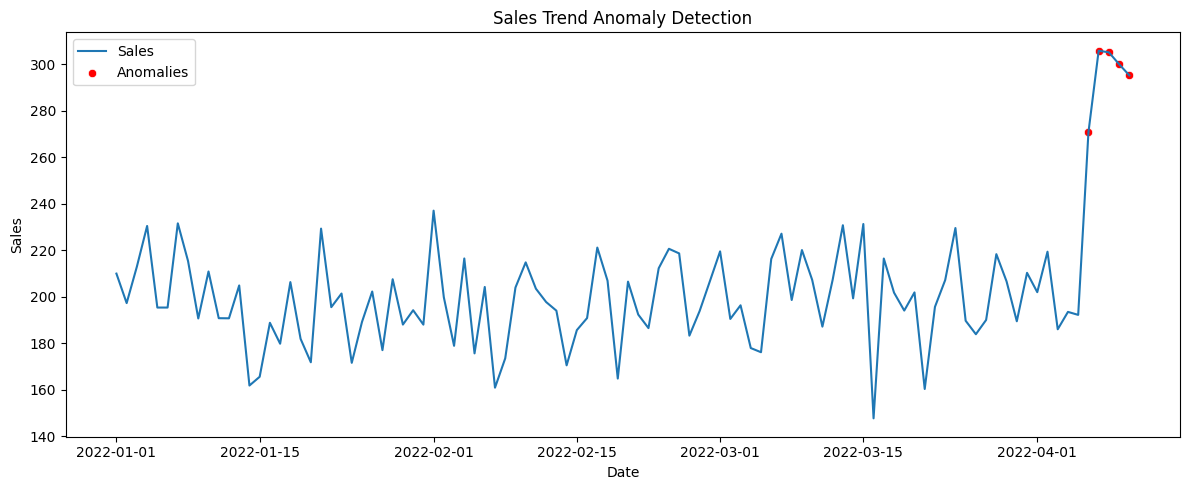


=== Task 2: Detecting Near-Duplicates using Clustering ===

Duplicate Clusters Found:
            name                email  age  cluster
0    Alice Smith      alice@gmail.com   25       -1
1   Alicia Smith     alicia@gmail.com   25       -1
2    Bob Johnson        bob@yahoo.com   32       -1
3  Bobby Johnson      bobby@yahoo.com   33       -1
4     Carol King    carol@outlook.com   29       -1
5   Carolyn King  carolyn@outlook.com   30       -1

=== Task 3: Classification of Data Validity ===

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75        90
           1       0.32      0.29      0.30        35

    accuracy                           0.63       125
   macro avg       0.53      0.53      0.53       125
weighted avg       0.62      0.63      0.62       125



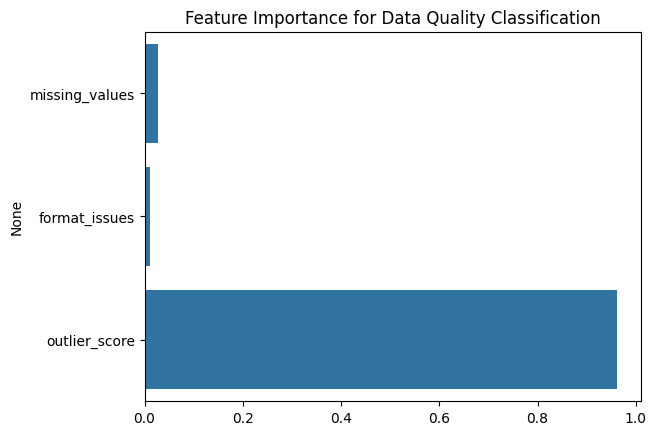

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# --------------------------
# Task 1: Anomaly Detection in Sales Trends
# --------------------------
print("\n=== Task 1: Detecting Anomalies in Sales Trends ===")

# Create sample sales dataset
np.random.seed(42)
dates = pd.date_range(start='2022-01-01', periods=100)
sales = np.random.normal(loc=200, scale=20, size=100)
sales[95:] += 100  # Simulate abnormal jump

sales_df = pd.DataFrame({"date": dates, "sales": sales})
sales_df['day_of_week'] = sales_df['date'].dt.dayofweek

# Isolation Forest for anomaly detection
model = IsolationForest(contamination=0.05, random_state=42)
sales_df['anomaly'] = model.fit_predict(sales_df[['sales', 'day_of_week']])
sales_df['anomaly'] = sales_df['anomaly'].map({1: 0, -1: 1})

# Plot anomalies
plt.figure(figsize=(12, 5))
sns.lineplot(data=sales_df, x='date', y='sales', label="Sales")
sns.scatterplot(data=sales_df[sales_df['anomaly'] == 1], x='date', y='sales', color='red', label="Anomalies")
plt.title("Sales Trend Anomaly Detection")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()

# --------------------------
# Task 2: Duplicate Detection with Clustering
# --------------------------
print("\n=== Task 2: Detecting Near-Duplicates using Clustering ===")

# Create sample dataset with near-duplicate entries
df_duplicates = pd.DataFrame({
    "name": ["Alice Smith", "Alicia Smith", "Bob Johnson", "Bobby Johnson", "Carol King", "Carolyn King"],
    "email": ["alice@gmail.com", "alicia@gmail.com", "bob@yahoo.com", "bobby@yahoo.com", "carol@outlook.com", "carolyn@outlook.com"],
    "age": [25, 25, 32, 33, 29, 30]
})

# Vectorize text with simple string length + ASCII sum as basic features
df_duplicates['name_length'] = df_duplicates['name'].apply(len)
df_duplicates['name_ascii'] = df_duplicates['name'].apply(lambda x: sum(ord(c) for c in x))
df_duplicates['email_length'] = df_duplicates['email'].apply(len)
df_duplicates['email_ascii'] = df_duplicates['email'].apply(lambda x: sum(ord(c) for c in x))

features = df_duplicates[['name_length', 'name_ascii', 'email_length', 'email_ascii', 'age']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Use DBSCAN to find clusters of similar (near-duplicate) records
clustering = DBSCAN(eps=1.5, min_samples=2).fit(X_scaled)
df_duplicates['cluster'] = clustering.labels_

print("\nDuplicate Clusters Found:")
print(df_duplicates[['name', 'email', 'age', 'cluster']])

# --------------------------
# Task 3: Classification to Validate Data
# --------------------------
print("\n=== Task 3: Classification of Data Validity ===")

# Create mock dataset
df_quality = pd.DataFrame({
    'missing_values': np.random.randint(0, 3, 500),
    'format_issues': np.random.randint(0, 2, 500),
    'outlier_score': np.random.rand(500),
    'quality_label': np.random.choice([0, 1], 500, p=[0.7, 0.3])  # 0 = valid, 1 = issue
})

X = df_quality.drop('quality_label', axis=1)
y = df_quality['quality_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

sns.barplot(x=rf.feature_importances_, y=X.columns)
plt.title("Feature Importance for Data Quality Classification")
plt.show()

